In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/insurance.csv')

df.head()
print(df.size)
df.dtypes

9366


,0
age,float64
sex,object
bmi,float64
children,float64
smoker,object
region,object
charges,object


Clean Dataset

In [ ]:
# Drop rows with Nan values
df.dropna(inplace=True)
df.size

8456

In [ ]:
# age - negative values
# sex - standardise male and female as M and F
# children - negative values
# region - convert strings to lowercase
# charges - remove '$' from price

# handle age and children
df.drop(df[(df['age'] < 0) | (df['children'] < 0)].index, inplace=True)
print(df.size)

# handle sex
df.replace(to_replace="F", value="female", inplace=True)
df.replace(to_replace="woman", value="female", inplace=True)
df.replace(to_replace="M", value="male", inplace=True)
df.replace(to_replace="man", value="male", inplace=True)

# handle region
df.region = df.region.str.lower()

# handle charges
df.charges = df.charges.str.strip('$').astype('float64')

# convert the smoker column to type boolean
df['smoker'] = (df['smoker'] == 'yes')

# remove float values from sex and region columns
df.sex = df.sex.astype('str')
df.region = df.region.astype('str')
df.dropna()

print(df.dtypes)
df.head()

7756
age         float64
sex          object
bmi         float64
children    float64
smoker         bool
region       object
charges     float64
dtype: object


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,True,southwest,16884.92400
1,18.0,male,33.770,1.0,False,southeast,1725.55230
2,28.0,male,33.000,3.0,False,southeast,4449.46200
3,33.0,male,22.705,0.0,False,northwest,21984.47061
4,32.0,male,28.880,0.0,False,northwest,3866.85520


In [ ]:
df.to_csv('cleaned_data.csv', index=False)

Scatterplots between variables

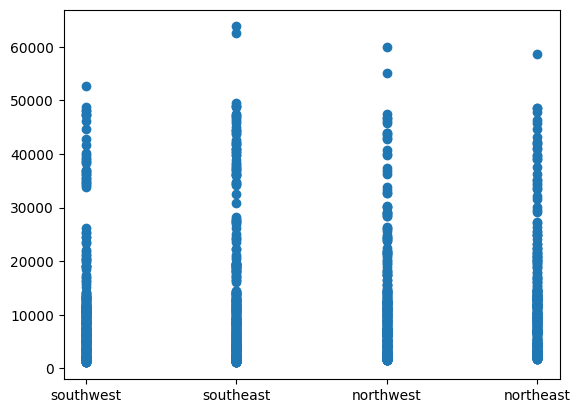

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv('/content/cleaned_data.csv')

plt.scatter(df['region'], df['charges'])
plt.show()

Dummy encoding

In [ ]:
df_new = pd.get_dummies(df, prefix=['region'], columns=['region'])
print(df.region.value_counts())

region
southeast    296
northwest    275
northeast    270
southwest    267
Name: count, dtype: int64


In [ ]:
# Convert dtype of smoker to int64
df_new.smoker = df_new.smoker.astype('int64')

# Convert sex to int64 as well
df_new['is_male'] = (df_new['sex'] == 'male').astype('int64')
df_new = df_new.drop(columns = ['sex'])
df_new.head()

,age,bmi,children,smoker,charges,is_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,1,16884.92400,0,False,False,False,True
1,18.0,33.770,1.0,0,1725.55230,1,False,False,True,False
2,28.0,33.000,3.0,0,4449.46200,1,False,False,True,False
3,33.0,22.705,0.0,0,21984.47061,1,False,True,False,False
4,32.0,28.880,0.0,0,3866.85520,1,False,True,False,False


In [ ]:
# Drop column with most values - in this case southeast
df_new = df_new.drop(columns=['region_southeast'])
df_new.head()

,age,bmi,children,smoker,charges,is_male,region_northeast,region_northwest,region_southwest
0,19.0,27.900,0.0,1,16884.92400,0,False,False,True
1,18.0,33.770,1.0,0,1725.55230,1,False,False,False
2,28.0,33.000,3.0,0,4449.46200,1,False,False,False
3,33.0,22.705,0.0,0,21984.47061,1,False,True,False
4,32.0,28.880,0.0,0,3866.85520,1,False,True,False


In [ ]:
df_new['region_northeast'] = df_new['region_northeast'].astype('int64')
df_new['region_northwest'] = df_new['region_northwest'].astype('int64')
df_new['region_southwest'] = df_new['region_southwest'].astype('int64')

df.dropna()
df_new.head()

,age,bmi,children,smoker,charges,is_male,region_northeast,region_northwest,region_southwest
0,19.0,27.900,0.0,1,16884.92400,0,0,0,1
1,18.0,33.770,1.0,0,1725.55230,1,0,0,0
2,28.0,33.000,3.0,0,4449.46200,1,0,0,0
3,33.0,22.705,0.0,0,21984.47061,1,0,1,0
4,32.0,28.880,0.0,0,3866.85520,1,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1108 non-null   float64
 1   sex       1108 non-null   object 
 2   bmi       1108 non-null   float64
 3   children  1108 non-null   float64
 4   smoker    1108 non-null   bool   
 5   region    1108 non-null   object 
 6   charges   1108 non-null   float64
 7   is_male   1108 non-null   int64  
dtypes: bool(1), float64(4), int64(1), object(2)
memory usage: 61.8+ KB


Fitting data into a Linear Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df_new.drop(columns=['charges'])
y = df_new['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2_error = r2_score(y_test, y_pred)

r2_error
# 0.7678309153181794

0.7678309153181794

Testing on Validation Dataset

In [ ]:
val_df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/Regression-Example/refs/heads/master/validation_dataset.csv')

val_df.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [ ]:
# Preprocess dataframe
def preprocess(df):
  df['is_male'] = (df['sex'] == 'male').astype('int64')
  df = df.drop(columns=['sex'])

  df['smoker'] = (df['smoker'] == 'yes').astype('int64')

  df = pd.get_dummies(df, prefix=['region'], columns=['region'])
  df = df.drop(columns=['region_southeast'])

  df['region_northeast'] = df['region_northeast'].astype('int64')
  df['region_northwest'] = df['region_northwest'].astype('int64')
  df['region_southwest'] = df['region_southwest'].astype('int64')

  df.dropna()

  return df

val_df = preprocess(val_df)
val_df

,age,bmi,children,smoker,is_male,region_northeast,region_northwest,region_southwest
0,18.0,24.090000,1.0,0,0,0,0,0
1,39.0,26.410000,0.0,1,1,1,0,0
2,27.0,29.150000,0.0,1,1,0,0,0
3,71.0,65.502135,13.0,1,1,0,0,0
4,28.0,38.060000,0.0,0,1,0,0,0
5,70.0,72.958351,11.0,1,0,0,0,0
6,29.0,32.110000,2.0,0,0,0,1,0
7,42.0,41.325000,1.0,0,0,1,0,0
8,48.0,36.575000,0.0,0,0,0,1,0
9,63.0,33.660000,3.0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Trian the model on the entire df_new csv file
X_train = df_new.drop(columns=['charges'])
y_train = df_new['charges']

X_test = val_df

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# We replace negative values with 1000
y_pred = [1000 if x < 0 else x for x in y_pred]

y_pred

[502.5851369462198,
 30758.179806590088,
 27806.210023727515,
 56529.31121610416,
 7124.658788761173,
 58084.04108228947,
 6937.041010901883,
 13153.756737846381,
 12609.169974912244,
 16129.967628793393,
 2482.5289203741377,
 14235.489006557584,
 11331.634547183681,
 11659.069436828207,
 2732.8516149837724,
 3865.4727652420643,
 42453.28060751979,
 63442.06592597336,
 58830.89798294595,
 11319.55325516343,
 1000,
 12793.890286557898,
 32166.84584487837,
 11808.006316388835,
 9718.898350430283,
 5202.340127533347,
 58169.94103562632,
 3055.609607836068,
 11738.707239517718,
 10344.027747668506,
 6274.19034504684,
 27173.259270823743,
 30644.54420381265,
 13182.82437700618,
 32068.65767465727,
 13943.139825576929,
 58364.28358928358,
 14195.732281098104,
 1000,
 29604.17616722225,
 29806.651544743996,
 11798.907542441635,
 3593.3942295351553,
 60033.51266062588,
 5857.314125559029,
 39851.482943493414,
 67391.99759333779,
 30837.90921564484,
 15160.636608152237,
 35391.14903147829]